In [21]:
## LCOE KINESYS

import pandas as pd

run_name_ref = 'ksref_tot_2_2105'
run_name_steps = 'steps~0002_1505'
run_name_aps = 'aps~0003_1505'
run_name_nze = 'nze~0004_2205'

path_ref = 'C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput VD file/' + run_name_ref + '/'
path_steps = 'C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput VD file/' + run_name_steps + '/'
path_aps = 'C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput VD file/' + run_name_aps + '/'
path_nze = 'C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput VD file/' + run_name_nze + '/'

filename_ref = 'VAR_NcapR_' + run_name_ref + '.csv'
filename_steps = 'VAR_NcapR_' + run_name_steps + '.csv'
filename_aps = 'VAR_NcapR_' + run_name_aps + '.csv'
filename_nze = 'VAR_NcapR_' + run_name_nze + '.csv'


var_NcapR = pd.read_csv(path_nze + filename_nze, sep = ',')
var_NcapR = var_NcapR[var_NcapR['2'].str.contains('H2prd')]
# var_NcapR = var_NcapR[var_NcapR['3'] == 2050]

var_NcapR.head()

,0,1,2,3,4,5,6,7,8
801,VAR_NcapR,-,H2prd_Elc_SOEC,2045,Africa_north,-,-,LEVCOST,16.900540
928,VAR_NcapR,-,H2prd_Elc_SOEC,2050,Africa_north,-,-,LEVCOST,15.517394
2197,VAR_NcapR,-,H2prd_Elc_SOEC,2050,Africa_other,-,-,LEVCOST,17.630019
2976,VAR_NcapR,-,H2prd_Elc_ALK01,2040,Arg-Chi,-,-,LEVCOST,12.868238
3095,VAR_NcapR,-,H2prd_Elc_SOEC,2045,Arg-Chi,-,-,LEVCOST,12.224935


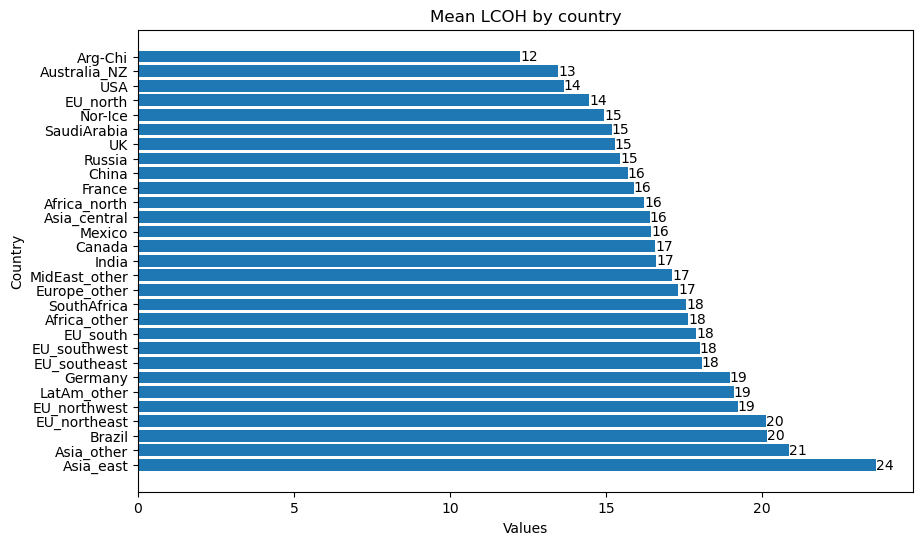

In [16]:
import matplotlib.pyplot as plt

var_NcapR['grp_cnt'] = var_NcapR.groupby('4')['8'].transform('mean')
var_NcapR = var_NcapR[~var_NcapR['grp_cnt'].duplicated()]

var_NcapR = var_NcapR.sort_values(by="grp_cnt", ascending=False)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
bars = plt.barh(var_NcapR["4"], var_NcapR["grp_cnt"])

# Add the values as annotations on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Values')
plt.ylabel('Country')
plt.title('Mean LCOH by country')
plt.show()

C:\Users\trouvebe\AppData\Local\Temp\ipykernel_22592\61714710.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\trouvebe\AppData\Local\Temp\ipykernel_22592\61714710.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.set_ticklabels(tick_labels)


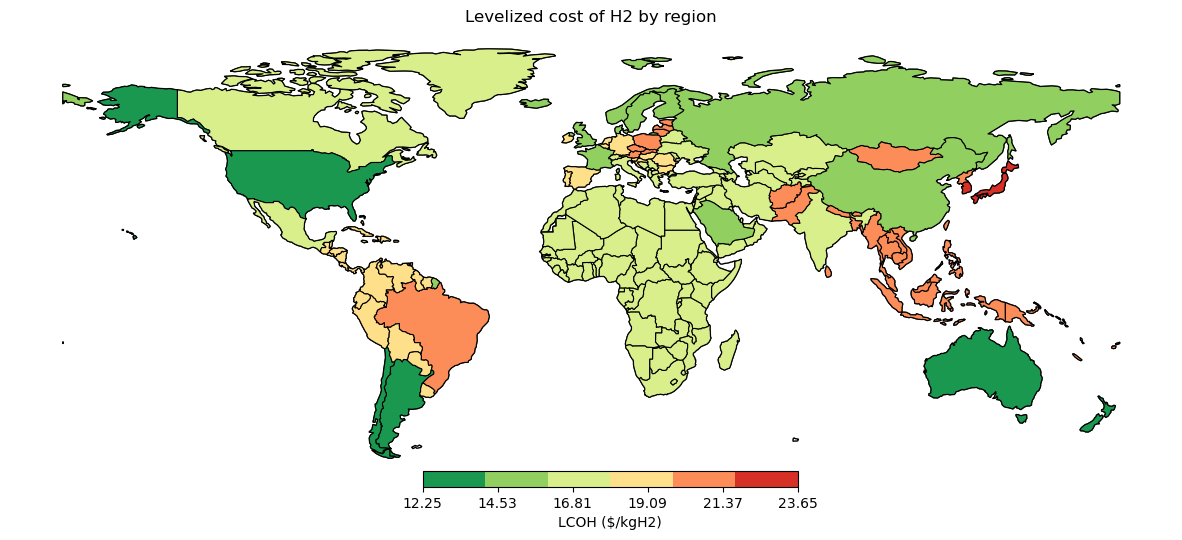

In [17]:

import geopandas as gpd
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import numpy as np



### aggreagate regions 

country_to_region = pd.read_excel('D:/Veda/Veda_models/kinesys_test - Copie/SubRes_Tmpl/SubRES_REZoning_Sol-Win_Trans.xlsx',sheet_name ='AVA')
country_to_region = country_to_region.iloc[3:].set_axis(country_to_region.iloc[2], axis=1).iloc[:,2:]
country_to_region['Country'] = ''

for index, row in country_to_region.iterrows():
    # Split the string in the original column based on the '-' symbol
    parts = row['PSET_PN'].split('-')
    # If there are two parts after splitting, assign the second part to the new column
    country_to_region.at[index, 'Country'] = parts[1].strip()

# country_to_region.head()

LCOH_map = country_to_region.merge(var_NcapR, how='left', left_on='Region', right_on='4').reset_index(drop=True)
LCOH_map = LCOH_map.dropna()
# LCOH_map['sum_per_group'] = LCOH_map.groupby('Region_x')['LCOE'].transform('mean')
LCOH_map.head(100)

## map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_LCOH_map = world.merge(LCOH_map, how='left', left_on='iso_a3', right_on='Country').reset_index(drop=True)
world_LCOH_map.shape


colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

# Create a colormap from the defined colors
cmap = ListedColormap(colors[::-1])

# # Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='white', edgecolor='black')
world_LCOH_map.plot(column='grp_cnt', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=False)

# Add title and customize plot
plt.title('Levelized cost of H2 by region')
plt.ylim([-60, 90])
plt.axis('off')  # Turn off axis

# Create a color bar
ax_legend = fig.add_axes([0.4, 0.2, 0.25, 0.02])  # [left, bottom, width, height]
colorbar = ColorbarBase(ax_legend, cmap=cmap, orientation='horizontal')
colorbar.set_label('LCOH ($/kgH2)')

min_val = world_LCOH_map['grp_cnt'].min()
max_val = world_LCOH_map['grp_cnt'].max()
num_ticks = len(colors)
tick_values = np.linspace(min_val, max_val, num_ticks)
tick_labels = [f'{value:.2f}' for value in tick_values]

# Set the color bar tick locations and labels
# colorbar.set_ticks(tick_values)
colorbar.set_ticklabels(tick_labels)

colorbar.set_label('LCOH ($/kgH2)')

plt.savefig('C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput figure Kinesys/LCOH_region_' + run_name_nze + '.pdf'
            , format ='pdf'
            ,  bbox_inches='tight')

In [18]:
var_NcapR = pd.read_csv(path_nze + filename_nze, sep = ',')
var_NcapR = var_NcapR[var_NcapR['2'].str.contains('SPV|WON|WOF')]
var_NcapR['group'] = var_NcapR['3'].astype(str).str.cat(var_NcapR['4'].astype(str), sep='_')
var_NcapR['group_value'] = var_NcapR.groupby('group')['8'].transform('mean')
var_NcapR = var_NcapR[~var_NcapR['group'].duplicated()]
var_NcapR.head(100)


,0,1,2,3,4,5,6,7,8,group,group_value
300,VAR_NcapR,-,EN_WON_59_c01_EGY,2025,Africa_north,-,-,LEVCOST,8.227939,2025_Africa_north,8.227939
413,VAR_NcapR,-,EN_WON_43_c04_LBY,2030,Africa_north,-,-,LEVCOST,11.192926,2030_Africa_north,9.893866
681,VAR_NcapR,-,EN_WON_43_c01_EGY,2040,Africa_north,-,-,LEVCOST,10.274815,2040_Africa_north,10.091620
803,VAR_NcapR,-,EN_SPV_23_c04_LBY,2045,Africa_north,-,-,LEVCOST,8.498446,2045_Africa_north,9.859133
929,VAR_NcapR,-,EN_WOF_51_c02_MAR,2050,Africa_north,-,-,LEVCOST,9.606947,2050_Africa_north,8.556739
...,...,...,...,...,...,...,...,...,...,...,...
19833,VAR_NcapR,-,EN_SPV_12_c03_DEU,2045,Germany,-,-,LEVCOST,12.254413,2045_Germany,12.254413
19948,VAR_NcapR,-,EN_SPV_12_c03_DEU,2050,Germany,-,-,LEVCOST,11.558262,2050_Germany,11.558262
20013,VAR_NcapR,-,EN_SPV_19_c01_IND,2019,India,-,-,LEVCOST,9.961555,2019_India,9.282668
20087,VAR_NcapR,-,EN_WON_32_c01_IND,2020,India,-,-,LEVCOST,10.911456,2020_India,10.911456


C:\Users\trouvebe\AppData\Local\Temp\ipykernel_22592\393138613.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\trouvebe\AppData\Local\Temp\ipykernel_22592\393138613.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.set_ticklabels(tick_labels)


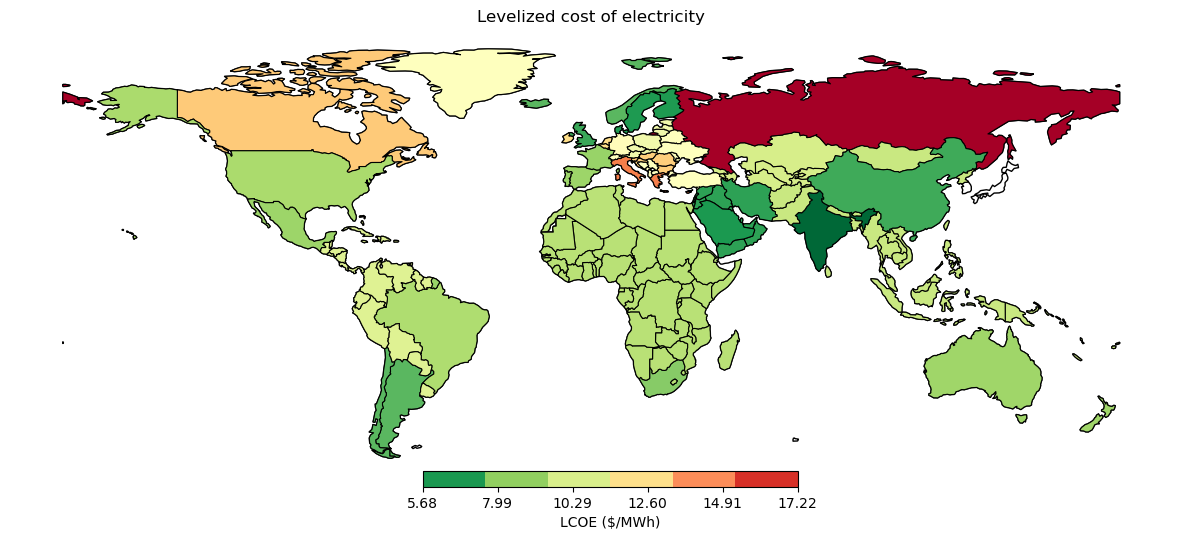

In [19]:
import geopandas as gpd
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.cm import ScalarMappable
from matplotlib.colors import BoundaryNorm

LCOE_2050 = var_NcapR[var_NcapR['3'] == 2050]
LCOE_2050 = LCOE_2050[LCOE_2050['4'] != 'Asia_east']

### aggreagate regions 

country_to_region = pd.read_excel('D:/Veda/Veda_models/kinesys_test - Copie/SubRes_Tmpl/SubRES_REZoning_Sol-Win_Trans.xlsx',sheet_name ='AVA')
country_to_region = country_to_region.iloc[3:].set_axis(country_to_region.iloc[2], axis=1).iloc[:,2:]
country_to_region['Country'] = ''

for index, row in country_to_region.iterrows():
    # Split the string in the original column based on the '-' symbol
    parts = row['PSET_PN'].split('-')
    # If there are two parts after splitting, assign the second part to the new column
    country_to_region.at[index, 'Country'] = parts[1].strip()

# country_to_region.head()

LCOE_map = country_to_region.merge(LCOE_2050, how='left', left_on='Region', right_on='4').reset_index(drop=True)
LCOE_map = LCOE_map.dropna()
# LCOH_map['sum_per_group'] = LCOH_map.groupby('Region_x')['LCOE'].transform('mean')
LCOE_map.head(100)

## map



world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

# Create a colormap from the defined colors
cmap = ListedColormap(colors[::-1])


world_LCOE_map = world.merge(LCOE_map, how='left', left_on='iso_a3', right_on='Country').reset_index(drop=True)
world_LCOE_map.shape

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.plot(ax=ax, color='white', edgecolor='black')
world_LCOE_map.plot(column='8', cmap='RdYlGn_r', linewidth=0.8, ax=ax, edgecolor='black', legend=False)

# norm = Normalize(vmin=world_LCOH_map['8'].min(), vmax=world_LCOH_map['8'].max())
# sm = ScalarMappable(cmap='RdYlGn_r', norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='vertical', shrink=0.35)  # Adjust aspect for size and orientation for horizontal
# cbar.set_label('')

# Rotate tick labels for horizontal colorbar
# cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), rotation=45)
# Add title and customize plot
plt.title('LCOE by country (except Asia_east)')
plt.ylim([-60,90])
plt.axis('off')  # Turn off axis
plt.title('Levelized cost of electricity')
plt.ylim([-60, 90])
plt.axis('off')  # Turn off axis

# Create a color bar
ax_legend = fig.add_axes([0.4, 0.2, 0.25, 0.02])  # [left, bottom, width, height]
colorbar = ColorbarBase(ax_legend, cmap=cmap, orientation='horizontal')


min_val = world_LCOE_map['8'].min()
max_val = world_LCOE_map['8'].max()
num_ticks = len(colors)
tick_values = np.linspace(min_val, max_val, num_ticks)
tick_labels = [f'{value:.2f}' for value in tick_values]

# Set the color bar tick locations and labels
# colorbar.set_ticks(tick_values)
colorbar.set_ticklabels(tick_labels)

colorbar.set_label('LCOE ($/MWh)')

plt.savefig('C:/Users/trouvebe/Desktop/Literature Thesis Chap 1/Literature Thesis Chap 1/Output/Ouput figure Kinesys/LCOE_region_' + run_name_nze + '.pdf'
            , format ='pdf'
            ,  bbox_inches='tight')


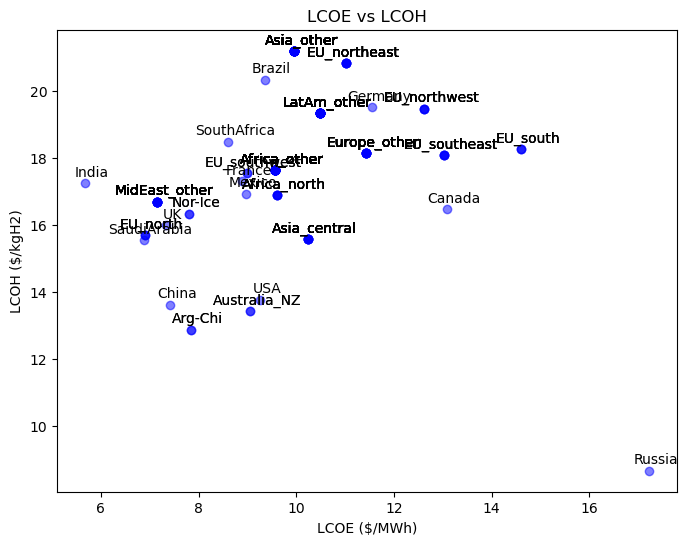

In [20]:
import seaborn as sns

lcoh = world_LCOH_map['8']
lcoe = world_LCOE_map['8']
region_name = world_LCOH_map['4']


plt.figure(figsize=(8, 6))
plt.scatter(lcoe, lcoh, color='blue', alpha=0.5)
plt.xlabel('LCOE ($/MWh)')
plt.ylabel('LCOH ($/kgH2)')
plt.title('LCOE vs LCOH')


for i, txt in enumerate(region_name):
    plt.annotate(txt, (lcoe[i], lcoh[i]), textcoords="offset points", xytext=(5,5), ha='center')
